# Нейросеть

## Обучение нейросети


In [182]:
!pip install tensorflow


In [183]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.preprocessing import image

# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 45
# Размер мини-выборки
batch_size = 16
# Количество изображений для обучения
nb_train_samples = 3495
# Количество изображений для проверки
nb_validation_samples = 750
# Количество изображений для тестирования
nb_test_samples = 755
# Название файла с сохраненной моделью
model_name = "model.keras"

print("Конец инициализации")

Конец инициализации


Создаем сверточную нейронную сеть
Архитектура сети

Слой свертки, размер ядра 3х3, количество карт признаков - 32 шт., функция активации ReLU.
Слой подвыборки, выбор максимального значения из квадрата 2х2
Слой свертки, размер ядра 3х3, количество карт признаков - 32 шт., функция активации ReLU.
Слой подвыборки, выбор максимального значения из квадрата 2х2
Слой свертки, размер ядра 3х3, количество карт признаков - 64 шт., функция активации ReLU.
Слой подвыборки, выбор максимального значения из квадрата 2х2
Слой преобразования из двумерного в одномерное представление
Полносвязный слой, 64 нейрона, функция активации ReLU.
Слой Dropout.
Выходной слой, 5 нейронов, функция активации softmax
Слои с 1 по 6 используются для выделения важных признаков в изображении, а слои с 7 по 10 - для классификации.

In [184]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.7))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(5))
model.add(Activation('softmax'))

Компилируем ИНС

In [185]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', Precision(), Recall()])

Создаем генератор изображений

Генератор изображений создается на основе класса ImageDataGenerator. Генератор делит значения всех пикселов изображения на 255.

In [186]:
datagen = ImageDataGenerator(rescale=1. / 255,
                             rotation_range=20,  # Вращение изображения на случайный угол в диапазоне [-20, 20] градусов
                             width_shift_range=0.1,  # Случайное горизонтальное смещение изображения на 10% ширины
                             height_shift_range=0.1,  # Случайное вертикальное смещение изображения на 10% высоты
                             shear_range=0.2,  # Случайное сдвигание изображения по направлению сдвига
                             zoom_range=0.2,  # Случайное масштабирование изображения в диапазоне [0.8, 1.2]
                             horizontal_flip=True,  # Случайное отражение изображения по горизонтали
                             fill_mode='nearest'  # Заполнение новых пикселей, возникающих после аугментации, соседними пикселями
                            )
common_datagen = ImageDataGenerator(rescale=1. / 255)

Генератор данных для обучения на основе изображений из каталога

In [187]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 3495 images belonging to 5 classes.


Генератор данных для проверки на основе изображений из каталога

In [188]:
val_generator = common_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 750 images belonging to 5 classes.


Генератор данных для тестирования на основе изображений из каталога

In [189]:
test_generator = common_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 755 images belonging to 5 classes.


Обучаем модель с использованием генераторов
train_generator - генератор данных для обучения

validation_data - генератор данных для проверки

In [190]:
from keras.callbacks import EarlyStopping

# Определение обратного вызова EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True, start_from_epoch = 30)

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stopping])

Epoch 1/45
218/218 [==============================] - 43s 191ms/step - loss: 1.5820 - accuracy: 0.2552 - precision_10: 0.5949 - recall_10: 0.0135 - val_loss: 1.5577 - val_accuracy: 0.2677 - val_precision_10: 1.0000 - val_recall_10: 0.0027
Epoch 2/45
218/218 [==============================] - 41s 188ms/step - loss: 1.5033 - accuracy: 0.3101 - precision_10: 0.6482 - recall_10: 0.0471 - val_loss: 2.2183 - val_accuracy: 0.2568 - val_precision_10: 0.4462 - val_recall_10: 0.1916
Epoch 3/45
218/218 [==============================] - 41s 188ms/step - loss: 1.4790 - accuracy: 0.3234 - precision_10: 0.6534 - recall_10: 0.0612 - val_loss: 2.3855 - val_accuracy: 0.3764 - val_precision_10: 0.4728 - val_recall_10: 0.1889
Epoch 4/45
218/218 [==============================] - 42s 194ms/step - loss: 1.4267 - accuracy: 0.3481 - precision_10: 0.6733 - recall_10: 0.0782 - val_loss: 1.9480 - val_accuracy: 0.3927 - val_precision_10: 0.5092 - val_recall_10: 0.1889
Epoch 5/45
218/218 [========================

218/218 [==============================] - 41s 188ms/step - loss: 0.7728 - accuracy: 0.6582 - precision_10: 0.7815 - recall_10: 0.4863 - val_loss: 1.8062 - val_accuracy: 0.4742 - val_precision_10: 0.5822 - val_recall_10: 0.4090
Epoch 36/45
218/218 [==============================] - 41s 188ms/step - loss: 0.7731 - accuracy: 0.6562 - precision_10: 0.7705 - recall_10: 0.5007 - val_loss: 1.9239 - val_accuracy: 0.4524 - val_precision_10: 0.5737 - val_recall_10: 0.3913
Epoch 37/45
218/218 [==============================] - 41s 186ms/step - loss: 0.7846 - accuracy: 0.6539 - precision_10: 0.7714 - recall_10: 0.4889 - val_loss: 1.2387 - val_accuracy: 0.5883 - val_precision_10: 0.6109 - val_recall_10: 0.4715
Epoch 38/45
218/218 [==============================] - 41s 188ms/step - loss: 0.7336 - accuracy: 0.6723 - precision_10: 0.7717 - recall_10: 0.5343 - val_loss: 1.5401 - val_accuracy: 0.4986 - val_precision_10: 0.5850 - val_recall_10: 0.4443
Epoch 39/45
218/218 [==============================]

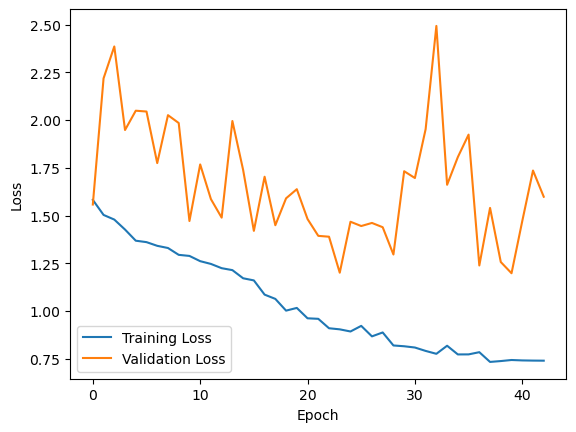

In [191]:
# Получение истории значения функции потерь
loss = history.history['loss']
val_loss = history.history['val_loss']

# Построение графика
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Сохраняем модель

In [192]:
model.save(model_name)

## Оцениваем качество работы сети с помощью генератора и загружаем сеть с диска

In [193]:
from keras.saving import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from keras.utils import to_categorical
import os

# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
model = load_model(model_name)
labels = os.listdir('train')
img_path="test/car/car998.jpg"

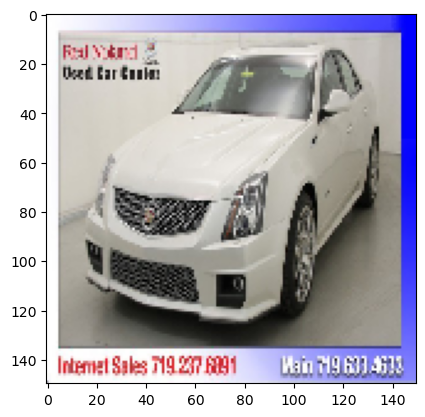

In [194]:
img = image.load_img(img_path, target_size=input_shape)
plt.imshow(img)
plt.show()

In [195]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [196]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(labels[prediction])

1/1 [==============================] - 0s 108ms/step
car


In [197]:
scores = model.evaluate(test_generator, steps=nb_test_samples // batch_size)

47/47 [==============================] - 6s 124ms/step - loss: 0.9472 - accuracy: 0.5891 - precision_10: 0.6696 - recall_10: 0.5066


In [198]:
print(scores)
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

[0.9472488760948181, 0.5890957713127136, 0.6695957779884338, 0.5066489577293396]
Аккуратность на тестовых данных: 58.91%


In [199]:
predict_labels = model.predict(test_generator)


48/48 [==============================] - 6s 122ms/step


In [218]:
from sklearn.metrics import confusion_matrix

real_labels = test_generator.classes

predict_labels_classes = [np.argmax(predict_labels[i]) for i in range(0, len(predict_labels))]
#predict_labels_classes
#real_labels

In [217]:
import pandas as pd

cm = confusion_matrix(real_labels, predict_labels_classes)

# Преобразуем матрицу в объект DataFrame с заголовками
df = pd.DataFrame(cm, columns=labels)
df['class'] = labels
print(df)
#print(cm)

   btr  car  civilian  soldier  tank     class
0   50   37        11       47     6       btr
1   59   31         2       52     7       car
2   53   38         8       44     8  civilian
3   39   48         7       53     4   soldier
4   50   47         8       44     2      tank


# Попробуем детектировать при помощи полученной нейросети


In [ ]:
import cv2
import matplotlib.pyplot as plt

detect_dir = 'detected'
detect_k = 0.99

cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
for file in os.listdir(detect_dir):
    im = cv2.imread(detect_dir + '/' + file)
    ss.setBaseImage(im)
    ss.switchToSelectiveSearchFast()
    rects = ss.process()
    imOut = im.copy()
    
    plt.figure()
    plt.imshow(imOut)
    plt.show()
    print('Общее число прямоугольников ', len(rects))
    for i, rect in enumerate(rects):
        if i > 1000:
            break
        x, y, w, h = rect
        resized = cv2.resize(imOut[y:y+h, x:x+w], (img_width, img_height), interpolation = cv2.INTER_AREA)
        img = image.img_to_array(resized)
        img /= 255
        img = np.expand_dims(img, axis=0)
        prediction_lst = model.predict(img,verbose = 0)
        #print(prediction_lst)
        prediction = np.argmax(prediction_lst)
        #print(prediction)
        if prediction_lst[0][prediction] > detect_k:
            cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
            cv2.putText(imOut, labels[prediction], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 3)
            
    plt.figure()
    plt.imshow(imOut)
    plt.show()
        
